In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import calendar

In [0]:
sample_df = spark.sql("SELECT * FROM hive_metastore.aquamanager_growout_dbo.view_sampling_details").toPandas()
harvest_df = spark.sql("SELECT * FROM hive_metastore.aquamanager_growout_dbo.view_harvesting_details").toPandas()

harvest_df = harvest_df.rename(columns={'cohort_id': 'cohort', 'cage_id': 'cage', 'average_weight': 'weight'})
harvest_df['batch'] = harvest_df['cohort'] + '-' + harvest_df['cage']
harvest_df['date'] = pd.to_datetime(harvest_df['date'])
harvest_df['month'] = harvest_df['date'].dt.month
harvest_df['year'] = harvest_df['date'].dt.year
harvest_df['month'] = harvest_df['month'].apply(lambda x: calendar.month_name[x])
harvest_df = harvest_df[['cohort', 'cage', 'date', 'weight', 'batch', 'month', 'year']]

sample_df = sample_df.rename(columns={'batch': 'cohort', 'sampleweight': 'weight'})
sample_df['batch'] = sample_df['cohort'] + '-' + sample_df['cage']
sample_df['date'] = pd.to_datetime(sample_df['date'])
sample_df['month'] = sample_df['date'].dt.month
sample_df['year'] = sample_df['date'].dt.year
sample_df['month'] = sample_df['month'].apply(lambda x: calendar.month_name[x])
sample_df = sample_df[sample_df['weight'] > 0]
sample_df = sample_df[['cohort', 'cage', 'date', 'weight', 'batch', 'month', 'year']]

sample_df['weight'] = sample_df['weight'].astype('float')
harvest_df['weight'] = harvest_df['weight'].astype('float')


/databricks/spark/python/pyspark/sql/pandas/utils.py:91: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [sampleweight] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(
/databricks/spark/python/pyspark/sql/pandas/utils.py:91: UserWarning: The conversion of DecimalType columns is inefficient and may take a long time. Column names: [total_weight, average_weight] If those columns are not necessary, you may consider dropping them or converting to primitive types before the conversion.
  warnings.warn(


In [0]:
harvest_df

,cohort,cage,date,weight,batch,month,year
0,SR-C0421Mx,C04A,2023-01-09,2026.983150,SR-C0421Mx-C04A,January,2023
1,SR-C0522MxEc,C05B,2023-04-23,1705.050973,SR-C0522MxEc-C05B,April,2023
2,SR-C0421Mx,C04A,2023-02-26,1805.369606,SR-C0421Mx-C04A,February,2023
3,SR-C0522MxEc,C05B,2023-05-24,2235.475896,SR-C0522MxEc-C05B,May,2023
4,SR-C0421Mx,C04A,2022-11-13,2540.103941,SR-C0421Mx-C04A,November,2022
...,...,...,...,...,...,...,...
103,SR-C0522MxEc,C05A,2023-06-18,2150.000000,SR-C0522MxEc-C05A,June,2023
104,SR-C0522MxEc,C05A,2023-06-20,2150.000000,SR-C0522MxEc-C05A,June,2023
105,SR-C06A22Ec,C06A,2023-06-18,2150.000000,SR-C06A22Ec-C06A,June,2023
106,SR-C0522MxEc,C05A,2023-06-22,2150.000000,SR-C0522MxEc-C05A,June,2023


<command-373323807256721>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fivea_df['post_stock'] = (fivea_df['date'] - pd.to_datetime(fivea_start_date)).dt.days
<command-373323807256721>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sixa_df['post_stock'] = (sixa_df['date'] - pd.to_datetime(sixa_start_date)).dt.days
<command-373323807256721>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

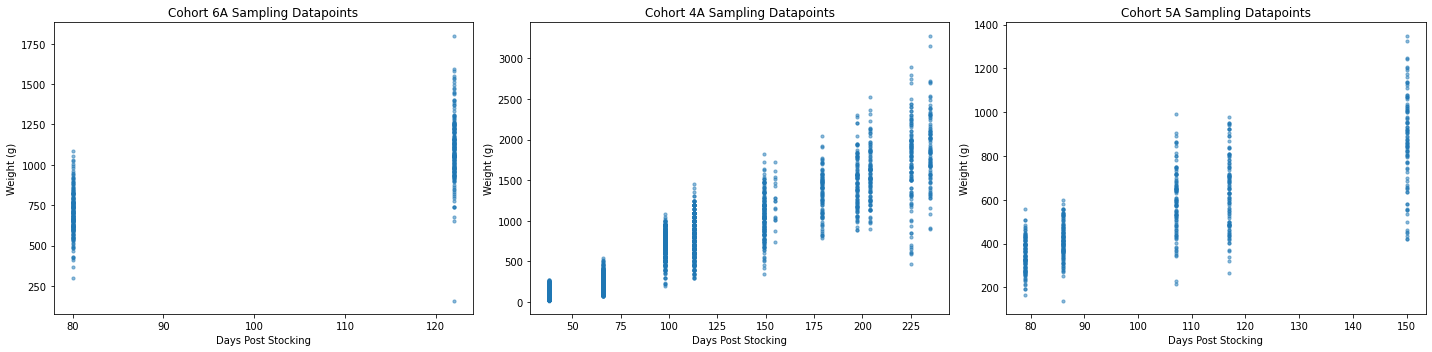

In [0]:
sixa_start_date = '2022-09-26'
fivea_start_date = '2022-03-20'
foura_start_date = '2021-11-22'

bins = 20

sixa_df = sample_df[sample_df['batch'] == 'SR-C06A22Ec-C06A']
foura_df = sample_df[sample_df['batch'] == 'SR-C0421Mx-C04A']
fivea_df = sample_df[sample_df['batch'] == 'SR-C0522MxEc-C05A']

fivea_df['post_stock'] = (fivea_df['date'] - pd.to_datetime(fivea_start_date)).dt.days
sixa_df['post_stock'] = (sixa_df['date'] - pd.to_datetime(sixa_start_date)).dt.days
foura_df['post_stock'] = (foura_df['date'] - pd.to_datetime(foura_start_date)).dt.days

fig, axs = plt.subplots(1, 3, tight_layout=True)
fig.set_size_inches(20, 5)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
fig.patch.set_facecolor('white')

axs[0].scatter(sixa_df['post_stock'], sixa_df['weight'], s=10, alpha=0.5)
axs[0].set_title('Cohort 6A Sampling Datapoints')
axs[0].set_xlabel('Days Post Stocking')
axs[0].set_ylabel('Weight (g)')

axs[1].scatter(foura_df['post_stock'], foura_df['weight'], s=10, alpha=0.5)
axs[1].set_title('Cohort 4A Sampling Datapoints')
axs[1].set_xlabel('Days Post Stocking')
axs[1].set_ylabel('Weight (g)')

axs[2].scatter(fivea_df['post_stock'], fivea_df['weight'], s=10, alpha=0.5)
axs[2].set_title('Cohort 5A Sampling Datapoints')
axs[2].set_xlabel('Days Post Stocking')
axs[2].set_ylabel('Weight (g)')

In [0]:
def plot_hist(df, ax, bins, cohort, start, end, post):
    ax.hist(df['weight'], bins=bins, rwidth=0.8, color='b', alpha=0.8)

    min_weight = df['weight'].min()
    max_weight = df['weight'].max()
    std_weight = df['weight'].std()
    avg_weight = df['weight'].median()
    total_sampled = df['weight'].count()

    # plot normal distribution curve
    x = np.linspace(min_weight, max_weight, 100)
    y = stats.norm.pdf(x, avg_weight, std_weight)

    # scale the normal distribution curve to the histogram
    y = y * df['weight'].count() * (max_weight - min_weight) / bins

    p50 = np.percentile(df['weight'], 50)
    p80 = np.percentile(df['weight'], 80)
    p95 = np.percentile(df['weight'], 95)

    # graph 50 percentile, 80 percentile, and 95 percentile
    ax.axvline(p50, color='r', linestyle='dashed', linewidth=1)
    ax.axvline(p80, color='r', linestyle='dashed', linewidth=1)
    ax.axvline(p95, color='r', linestyle='dashed', linewidth=1)
    ax.axvline(p50 - (p80 - p50), color='r', linestyle='dashed', linewidth=1)
    ax.axvline(p50 - (p95 - p50), color='r', linestyle='dashed', linewidth=1)

    ax.plot(x, y, color='lime', linewidth=1, linestyle='dashed')
    #ax.axvline(avg_weight, color='r', linestyle='dashed', linewidth=4)
    #ax.axvspan(minus_std_weight, plus_std_weight, alpha=0.2, color='red')
    ax.hist(df['weight'], bins=bins, rwidth=0.8, color='b', alpha=0.8)
    ax.set_xlabel('Weight (grams)')
    ax.set_ylabel('Amount of Fish')
    ax.set_xlim([min_weight, max_weight])
    ax.grid(True, which='both', alpha=0.5)

    start_date = start.strftime('%Y-%m-%d')
    end_date = end.strftime('%Y-%m-%d')

    title = '"' + cohort + '" ' + post
    title += ' (' + start_date + ' - ' + end_date + ')'
    title += f'\nSTD: {std_weight:.2f}g, Sampled: {total_sampled} fish'
    title += f'\n50%: {p50:.2f}g, 80%: {p80:.2f}g, 95%: {p95:.2f}g'

    ax.set_title(title)

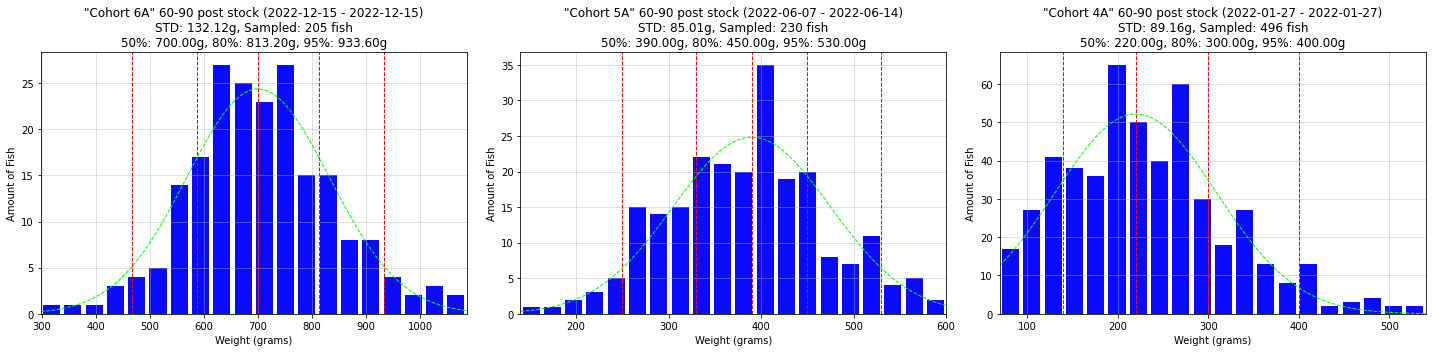

In [0]:
sa_df = sixa_df[(sixa_df['post_stock'] > 60) & (sixa_df['post_stock'] < 90)]
fva_df = fivea_df[(fivea_df['post_stock'] > 60) & (fivea_df['post_stock'] < 90)]
foa_df = foura_df[(foura_df['post_stock'] > 60) & (foura_df['post_stock'] < 90)]

fig, axs = plt.subplots(1, 3, tight_layout=True)
fig.set_size_inches(20, 5)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
fig.patch.set_facecolor('white')

plot_hist(sa_df, axs[0], bins, 'Cohort 6A', sa_df['date'].min(), sa_df['date'].max(), '60-90 post stock')
plot_hist(fva_df, axs[1], bins, 'Cohort 5A', fva_df['date'].min(), fva_df['date'].max(), '60-90 post stock')
plot_hist(foa_df, axs[2], bins, 'Cohort 4A', foa_df['date'].min(), foa_df['date'].max(), '60-90 post stock')

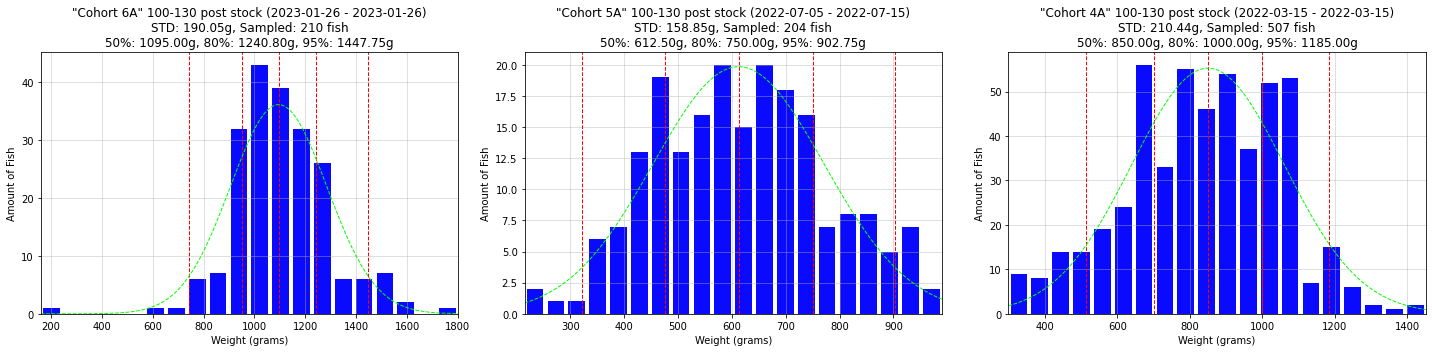

In [0]:
sa_df = sixa_df[(sixa_df['post_stock'] > 100) & (sixa_df['post_stock'] < 130)]
fva_df = fivea_df[(fivea_df['post_stock'] > 100) & (fivea_df['post_stock'] < 130)]
foa_df = foura_df[(foura_df['post_stock'] > 100) & (foura_df['post_stock'] < 130)]

fig, axs = plt.subplots(1, 3, tight_layout=True)
fig.set_size_inches(20, 5)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
fig.patch.set_facecolor('white')

plot_hist(sa_df, axs[0], bins, 'Cohort 6A', sa_df['date'].min(), sa_df['date'].max(), '100-130 post stock')
plot_hist(fva_df, axs[1], bins, 'Cohort 5A', fva_df['date'].min(), fva_df['date'].max(), '100-130 post stock')
plot_hist(foa_df, axs[2], bins, 'Cohort 4A', foa_df['date'].min(), foa_df['date'].max(), '100-130 post stock')

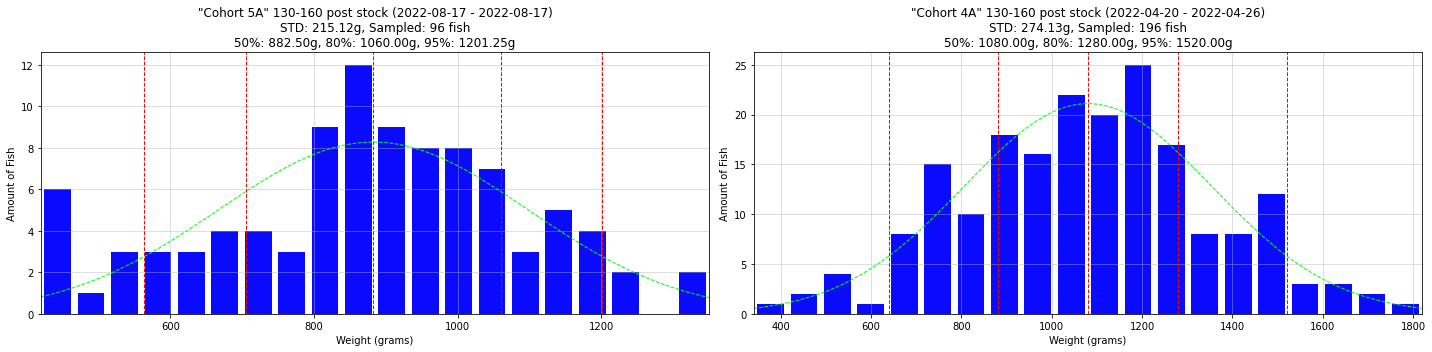

In [0]:
fva_df = fivea_df[(fivea_df['post_stock'] > 130) & (fivea_df['post_stock'] < 160)]
foa_df = foura_df[(foura_df['post_stock'] > 130) & (foura_df['post_stock'] < 160)]

fig, axs = plt.subplots(1, 2, tight_layout=True)
fig.set_size_inches(20, 5)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
fig.patch.set_facecolor('white')

plot_hist(fva_df, axs[0], bins, 'Cohort 5A', fva_df['date'].min(), fva_df['date'].max(), '130-160 post stock')
plot_hist(foa_df, axs[1], bins, 'Cohort 4A', foa_df['date'].min(), foa_df['date'].max(), '130-160 post stock')